In [1]:
using OscarPolytope
import HomotopyContinuation
const HC = HomotopyContinuation
import Oscar
const PM = Polymake


Welcome to Nemo version 0.18.2

Nemo comes with absolutely no warranty whatsoever

Singular.jl, based on
                     SINGULAR                                 /  
 A Computer Algebra System for Polynomial Computations       /  Singular.jl: 0.4.1 
                                                           0<   Singular   : 2.3.1-4
 by: W. Decker, G.-M. Greuel, G. Pfister, H. Schoenemann     \   
FB Mathematik der Universitaet, D-67653 Kaiserslautern        \
     


$\require{action}$


Welcome to 

    _    _           _
   | |  | |         | |
   | |__| | ___  ___| | _____
   |  __  |/ _ \/ __| |/ / _ \
   | |  | |  __/ (__|   <  __/
   |_|  |_|\___|\___|_|\_\___|
    
Version 0.8.5 ... 
 ... which comes with absolutely no warranty whatsoever
(c) 2015-2020 by Claus Fieker, Tommy Hofmann and Carlo Sircana

 ┌───────┐   GAP 4.11.0 of 29-Feb-2020
 │  GAP  │   https://www.gap-system.org
 └───────┘   Architecture: x86_64-pc-linux-gnu-julia64-kv7-v1.5
 Configuration:  gmp 6.2.1, Julia GC, Julia 1.5.3, readline
 Loading the library and packages ...
 Packages:   AClib 1.3.2, Alnuth 3.1.2, AtlasRep 2.1.0, AutoDoc 2019.09.04, 
             AutPGrp 1.10.2, CRISP 1.4.5, Cryst 4.1.23, CrystCat 1.1.9, 
             CTblLib 1.2.2, FactInt 1.6.3, FGA 1.4.0, GAPDoc 1.6.3, 
             IRREDSOL 1.4, LAGUNA 3.9.3, Polenta 1.3.9, Polycyclic 2.15.1, 
             PrimGrp 3.4.0, RadiRoot 2.8, ResClasses 4.7.2, SmallGrp 1.4.1, 
             Sophus 1.24, SpinSym 1.5.2, TomLib 1.2.9, Tran

┌ Warning: Setting `POLYMAKE_CONFIG` to use a custom polymake installation is no longer supported. Please use `Overrides.toml` to override `polymake_jll` and `libpolymake_julia_jll`.
└ @ Polymake /home/mic/.julia/packages/Polymake/omVjG/src/Polymake.jl:89


polymake version 4.2
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

 -----    -----    -----      -      -----   
|     |  |     |  |     |    | |    |     |  
|     |  |        |         |   |   |     |  
|     |   -----   |        |     |  |-----   
|     |        |  |        |-----|  |   |    
|     |  |     |  |     |  |     |  |    |   
 -----    -----    -----   -     -  -     -  

...combining (and extending) ANTIC, GAP, Polymake and Singular
Version 0.5.0 ... 
 ... which comes with absolutely no warranty whatsoever
Type: '?Oscar' for more information
(c) 2019-2020 by The Oscar Development Team


Polymake

In [2]:
# declare variables x and y
HC.@var x y

# coefficents (should be nonzero)
a=3
b=-5
c=7

# define the polynomials
f1 = a*x^3*y^2 + b*x + y^2 + 1
f2 = c*x*y^4 + x^3 + y

I = HC.System([f1, f2])
result = HC.solve(I)

Tracking 18 paths... 100%|██████████████████████████████| Time: 0:00:05
  # paths tracked:                  18
  # non-singular solutions (real):  18 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         18 (2)


Result with 18 solutions
• 18 paths tracked
• 18 non-singular solutions (2 real)
• random_seed: 0x72a42ac9
• start_system: :polyhedral


In [3]:
HC.solutions(result)

18-element Array{Array{Complex{Float64},1},1}:
 [1.340225711645152 + 0.9159833603576045im, 0.6590525482311473 - 0.3794165713690084im]
 [-1.5100478578303818 + 0.747148406080495im, 0.7045914201772829 + 0.40141743901854726im]
 [-0.02442606686413184 - 1.5916615157207026im, 0.004868431285595915 + 0.8120271592489284im]
 [0.32382288015373734 - 3.851859888774472e-34im, -0.7495841367553178 + 0.0im]
 [-1.4977914053203611 + 0.835403679367293im, -0.6669583945843404 - 0.42523554469922104im]
 [-0.02560796504818028 - 1.6893260277716458im, -0.007105971404015341 - 0.7653188139169057im]
 [-1.5100478578303818 - 0.7471484060804948im, 0.7045914201772829 - 0.4014174390185472im]
 [1.3402257116451521 - 0.9159833603576046im, 0.6590525482311473 + 0.3794165713690084im]
 [-0.025607965048180276 + 1.6893260277716458im, -0.007105971404015341 + 0.7653188139169057im]
 [-1.4977914053203614 - 0.835403679367293im, -0.6669583945843404 + 0.4252355446992211im]
 [1.3196957586419347 - 0.8127670055293637im, -0.7032022887072434

In [4]:
HC.real_solutions(result)

2-element Array{Array{Float64,1},1}:
 [0.32382288015373734, -0.7495841367553178]
 [0.20001311243612505, -0.008001579334804713]

In [5]:
using ImplicitPlots, Plots
p = plot(legend=false);

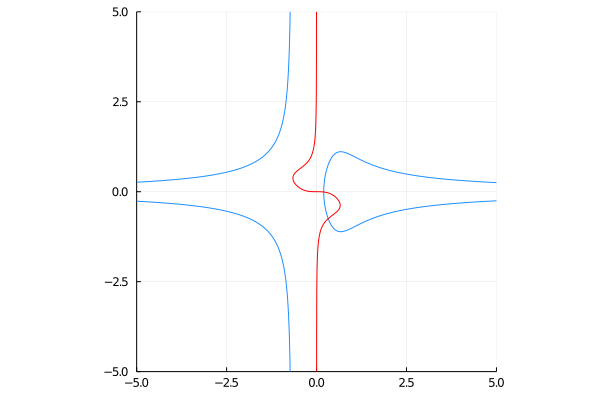

In [6]:
implicit_plot!(p, f1);
implicit_plot!(p, f2; linecolor=:red);
p

In [7]:
function hc_newton_polytope(f)
    convex_hull(transpose(first(HC.exponents_coefficients(f, [x,y]))))
end

P1 = hc_newton_polytope(f1)
P2 = hc_newton_polytope(f2)

A Polyhedron with neither vertex nor face representation computed.

In [8]:
facets(P1)

polymake: used package ppl
  The Parma Polyhedra Library ([[wiki:external_software#PPL]]): A C++ library for convex polyhedra
  and other numerical abstractions.
  http://www.cs.unipr.it/ppl/



(A = pm::Matrix<pm::Rational>
-1 0
0 -1
1 -1
0 1
, b = pm::Vector<pm::Rational>
0 0 1 2)

In [9]:
P1.pm_polytope.FACETS

pm::Matrix<pm::Rational>
0 1 0
0 0 1
1 -1 1
2 0 -1


In [10]:
P2.pm_polytope.F_VECTOR

polymake: used package cdd
  cddlib
  Implementation of the double description method of Motzkin et al.
  Copyright by Komei Fukuda.
  http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/

polymake: used package lrs
  Implementation of the reverse search algorithm of Avis and Fukuda.
  Copyright by David Avis.
  http://cgm.cs.mcgill.ca/~avis/C/lrs.html



pm::Vector<pm::Integer>
3 3

In [11]:
PM.polytope.mixed_volume(P1.pm_polytope,P2.pm_polytope)

18